### LDA Sample
### Source :https://towardsdatascience.com/linear-discriminant-analysis-in-python-76b8b17817c2 

In [1]:
#import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

from sklearn.datasets import load_wine

In [2]:
#initialization
np.set_printoptions(precision=4)
sns.set()

In [3]:
#load wine dataset
wine_ds = load_wine()

print('DS features : ', wine_ds.feature_names)
print('DS target classes : ', wine_ds.target_names)


DS features :  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
DS target classes :  ['class_0' 'class_1' 'class_2']


In [4]:
# prepare dataframe object 

x = pd.DataFrame( data = wine_ds.data, columns=wine_ds.feature_names)
X = x
y = pd.Categorical.from_codes(wine_ds.target, wine_ds.target_names)

print('X shape {}, Y Shape{}'.format(x.shape, y.shape))


X shape (178, 13), Y Shape(178,)


In [5]:
# print the data
x.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [6]:
pd.DataFrame(data=y).head()

,0
0,class_0
1,class_0
2,class_0
3,class_0
4,class_0


In [7]:
#combine X and Y
wine_ds_df = x.join(pd.Series(data=y, name='class'))
wine_ds_df.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0


### LDA - Steps


In [8]:
#compute mean vector for each class
#empty data frame with column names
class_feature_means = pd.DataFrame(columns=wine_ds.target_names)

for index, rows in wine_ds_df.groupby('class'):
    class_feature_means[index] = rows.mean()
    
class_feature_means

,class_0,class_1,class_2
alcohol,13.744746,12.278732,13.153750
malic_acid,2.010678,1.932676,3.333750
ash,2.455593,2.244789,2.437083
alcalinity_of_ash,17.037288,20.238028,21.416667
magnesium,106.338983,94.549296,99.312500
total_phenols,2.840169,2.258873,1.678750
flavanoids,2.982373,2.080845,0.781458
nonflavanoid_phenols,0.290000,0.363662,0.447500
proanthocyanins,1.899322,1.630282,1.153542
color_intensity,5.528305,3.086620,7.396250


In [9]:
#Within class scatter matrix 
within_class_scatter_matrix = np.zeros((13,13))

for indexOuter, rows in wine_ds_df.groupby('class'):
    rows = rows.drop(['class'], axis=1)
    s = np.zeros((13,13))
     
    #need to make the below change
    # mc = class_feature_means[indexOuter].values.reshape(13,1) 
    for indexInner, row in rows.iterrows():
        x, mc = row.values.reshape(13,1), class_feature_means[indexOuter].values.reshape(13,1)
        s += (x-mc).dot((x-mc).T)
    within_class_scatter_matrix += s

In [10]:
within_class_scatter_matrix

array([[ 4.5859e+01,  1.4303e+00, -2.3291e+00, -1.7013e+01,  3.1383e+00,
         4.7422e+00,  3.9605e+00, -1.7072e-01,  2.9350e+00,  4.3130e+01,
         1.3687e-01, -8.7244e-01,  2.1415e+03],
       [ 1.4303e+00,  1.5532e+02,  3.7434e+00,  7.2582e+01, -1.5563e+02,
        -2.5349e+00, -1.6466e+00,  1.7807e+00,  3.0105e+00, -4.5273e+01,
        -7.3732e+00,  8.1426e+00, -5.7852e+03],
       [-2.3291e+00,  3.7434e+00,  1.1563e+01,  8.4728e+01,  1.2067e+02,
         2.8298e+00,  5.2449e+00,  1.2286e+00,  4.6912e-01,  1.7140e+00,
         4.0639e-01,  1.9095e+00, -8.7672e+01],
       [-1.7013e+01,  7.2582e+01,  8.4728e+01,  1.4012e+03,  5.6662e+02,
         1.9008e+01,  4.3123e+01,  8.2101e+00,  1.6227e+01, -1.7814e+01,
        -1.7204e+00,  3.9486e+01, -5.7458e+03],
       [ 3.1383e+00, -1.5563e+02,  1.2067e+02,  5.6662e+02,  3.1615e+04,
         1.0100e+02,  1.1670e+02, -5.0235e+01,  2.2757e+02,  3.1017e+02,
         2.2078e+01, -4.9198e+01,  8.3344e+04],
       [ 4.7422e+00, -2.5349e+

In [11]:
#Between class matrix 
feature_means = wine_ds_df.mean()
between_class_scatter_matrix = np.zeros((13,13))

for mean in class_feature_means:
    n = len(wine_ds_df.loc[wine_ds_df['class'] == mean ].index)
    mc, m = class_feature_means[mean].values.reshape(13,1), feature_means.values.reshape(13,1)
    
    between_class_scatter_matrix += n * (mc - m).dot((mc-m).T)

In [12]:
feature_means

alcohol                          13.000618
malic_acid                        2.336348
ash                               2.366517
alcalinity_of_ash                19.494944
magnesium                        99.741573
total_phenols                     2.295112
flavanoids                        2.029270
nonflavanoid_phenols              0.361854
proanthocyanins                   1.590899
color_intensity                   5.058090
hue                               0.957449
od280/od315_of_diluted_wines      2.611685
proline                         746.893258
dtype: float64

In [13]:
between_class_scatter_matrix

array([[ 7.0795e+01,  1.3723e+01,  1.0668e+01, -1.3186e+02,  5.5262e+02,
         2.1257e+01,  3.0029e+01, -2.6178e+00,  8.3076e+00,  1.3888e+02,
        -2.4933e+00,  8.2530e+00,  2.6987e+04],
       [ 1.3723e+01,  6.5578e+01,  5.1556e+00,  1.1793e+02,  1.5062e+00,
        -3.8943e+01, -7.9531e+01,  5.4292e+00, -2.7994e+01,  1.5941e+02,
        -1.7995e+01, -5.9906e+01, -6.1709e+03],
       [ 1.0668e+01,  5.1556e+00,  1.7592e+00, -1.2829e+01,  7.8095e+01,
         1.0900e+00,  3.3671e-01, -1.0316e-01, -2.0087e-01,  2.7430e+01,
        -1.2351e+00, -1.7747e+00,  3.5073e+03],
       [-1.3186e+02,  1.1793e+02, -1.2829e+01,  5.7283e+02, -1.2702e+03,
        -1.3780e+02, -2.5058e+02,  1.8415e+01, -8.2987e+01,  4.3483e+01,
        -3.5293e+01, -1.5564e+02, -7.6268e+04],
       [ 5.5262e+02,  1.5062e+00,  7.8095e+01, -1.2702e+03,  4.4910e+03,
         2.3822e+02,  3.7768e+02, -3.0399e+01,  1.1454e+02,  8.6166e+02,
         9.9330e+00,  1.6767e+02,  2.2980e+05],
       [ 2.1257e+01, -3.8943e+

In [14]:
#Eigen vector and values calculation
eigen_values, eigen_vectors = np.linalg.eig(np.linalg.inv(within_class_scatter_matrix).dot(between_class_scatter_matrix))

In [15]:
pairs = [ (np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]

pairs = sorted(pairs, key=lambda x: x[0], reverse=True)

for pair in pairs:
    print(pair[0])

9.081739435042472
4.128469045639484
8.881784197001252e-16
7.41949604398113e-16
7.41949604398113e-16
6.57104310784389e-16
6.57104310784389e-16
2.9039090283069212e-16
2.9039090283069212e-16
2.58525572226227e-16
6.126103277916086e-17
6.126103277916086e-17
4.86945776983596e-17


In [16]:
#print percentage 
eigen_value_sum = sum(eigen_values)
print('Variance Explained')
for i, pair in enumerate(pairs):
    print('Eigenvector {} : {}'.format(i, (pair[0]/eigen_value_sum).real))

Variance Explained
Eigenvector 0 : 0.6874788878860784
Eigenvector 1 : 0.31252111211392164
Eigenvector 2 : 6.723424698398662e-17
Eigenvector 3 : 5.616486715430028e-17
Eigenvector 4 : 5.616486715430028e-17
Eigenvector 5 : 4.9742160522698054e-17
Eigenvector 6 : 4.9742160522698054e-17
Eigenvector 7 : 2.1982310366664338e-17
Eigenvector 8 : 2.1982310366664338e-17
Eigenvector 9 : 1.957013567229342e-17
Eigenvector 10 : 4.637400906181487e-18
Eigenvector 11 : 4.637400906181487e-18
Eigenvector 12 : 3.686132415666904e-18


In [17]:
#create W matrix with first two eigen vector
w_matrix = np.hstack((pairs[0][1].reshape(13,1), pairs[1][1].reshape(13,1))).real

In [18]:
x

array([[ 14.13],
       [  4.1 ],
       [  2.74],
       [ 24.5 ],
       [ 96.  ],
       [  2.05],
       [  0.76],
       [  0.56],
       [  1.35],
       [  9.2 ],
       [  0.61],
       [  1.6 ],
       [560.  ]])

In [19]:
w_matrix = np.hstack((pairs[0][1].reshape(13,1), pairs[1][1].reshape(13,1))).real

In [20]:
w_matrix

array([[-1.4368e-01, -2.5445e-01],
       [ 5.8860e-02, -8.9130e-02],
       [-1.3146e-01, -6.8467e-01],
       [ 5.5136e-02,  4.2724e-02],
       [-7.7060e-04,  1.3506e-04],
       [ 2.2014e-01,  9.4018e-03],
       [-5.9168e-01,  1.4360e-01],
       [-5.3278e-01,  4.7602e-01],
       [ 4.7761e-02,  8.9628e-02],
       [ 1.2646e-01, -7.3909e-02],
       [-2.9137e-01,  4.4236e-01],
       [-4.1230e-01, -1.4939e-02],
       [-9.5856e-04, -8.3269e-04]])

In [21]:
#lda  where k =2 

x_lda = X.dot(w_matrix)

In [38]:
x_lda

,0,1
0,-4.961962,-4.851209
1,-4.820100,-4.615169
2,-4.506220,-4.690671
3,-4.785834,-5.441868
4,-3.825653,-4.405262
...,...,...
173,-1.759275,-5.263088
174,-1.683840,-4.881682
175,-1.490016,-5.206437
176,-1.764743,-4.983205


In [41]:
#matplot lib can't handle categorical variable directly. so encode it.

le = LabelEncoder()
y = le.fit_transform(wine_ds_df['class'])

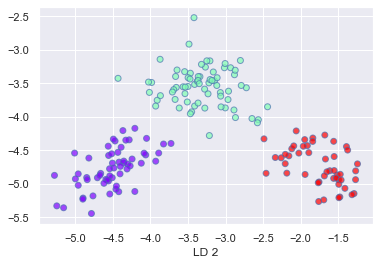

In [46]:
#draw graph 

plt.xlabel('LD 1')
plt.xlabel('LD 2')
plt.scatter(x_lda[0], x_lda[1], c=y, cmap='rainbow', alpha=0.7, edgecolors='b')
plt.show()



### Preimplemented LDA algorithm

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_standard = LinearDiscriminantAnalysis()


In [25]:

x_lda_standard = lda_standard.fit_transform(X, y)

In [26]:
lda_standard.explained_variance_ratio_

array([0.6875, 0.3125])

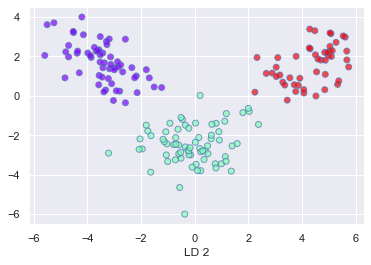

In [27]:
plt.xlabel('LD 1')
plt.xlabel('LD 2')
plt.scatter(x_lda_standard[:,0], x_lda_standard[:,1], c=y, cmap='rainbow', alpha=0.7, edgecolors='b')


### Apply PCA  

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca_standard = pca.fit_transform(X,y)

In [29]:
pca.explained_variance_ratio_

array([0.9981, 0.0017])

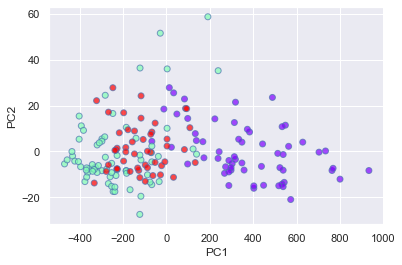

In [30]:
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(x_pca_standard[:,0],x_pca_standard[:,1], c=y, cmap='rainbow', alpha=0.7, edgecolors='b')


### Building DecisionTree

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x_lda, y, random_state=1)

In [32]:
decision_tree = DecisionTreeClassifier()


In [33]:
decision_tree.fit(x_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [34]:
y_predict = decision_tree.predict(x_test)

In [35]:
confusion_matrix(y_test, y_predict)

array([[18,  0,  0],
       [ 0, 17,  0],
       [ 0,  0, 10]], dtype=int64)

In [36]:
print('Classification Report : ',classification_report(y_test, y_predict))

Classification Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        10

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [37]:
print('F1 score : ', f1_score(y_test, y_predict, average='micro')) # average types requires revisit

F1 score :  1.0


### comparision using Decision Tree without applying LDA dataset 

In [53]:
x_train_simple, x_test_simple, y_train_simple, y_test_simple = train_test_split(X, y, random_state=1)

In [54]:
decision_tree_simple = DecisionTreeClassifier()
decision_tree_simple.fit(x_train_simple, y_train_simple)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [55]:
predicted_result_simple = decision_tree_simple.predict(x_test_simple)

In [57]:
print('confusion matrix : \n', confusion_matrix(predicted_result_simple, y_test_simple))

confusion matrix : 
 [[18  1  0]
 [ 0 15  0]
 [ 0  1 10]]


In [58]:
print('F1 core : ', f1_score(y_test_simple, predicted_result_simple, average='macro'))

F1 core :  0.9542846417846418


### test sample 

In [60]:
#use entire dataset for testing 
#1. use decision tree got trained using LDA 
predicted_result1 = decision_tree.predict(x_lda)

In [61]:
print('confusion matrix - test 1 \n', confusion_matrix(y, predicted_result1))

confusion matrix - test 1 
 [[59  0  0]
 [ 0 71  0]
 [ 0  0 48]]


In [62]:
#2. use decision tree on normal dataset 

In [63]:
predicted_result2 = decision_tree_simple.predict(X)

In [64]:
print('confusion matrix - test 2 \n', confusion_matrix(y, predicted_result2))

confusion matrix - test 2 
 [[59  0  0]
 [ 1 69  1]
 [ 0  0 48]]
